# Import Libraries

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import importlib
import sys
import os

sys.path.append("../../..")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'

import nucml.exfor.data_utilities as exfor_utils
import nucml.plot.plotting_utilities as plot_utils
import nucml.endf.data_utilities as endf_utils
import nucml.datasets as nuc_data
import nucml.endf.plotting_utilities as endf_plot

In [297]:
importlib.reload(exfor_utils)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
importlib.reload(endf_plot)
print("Finish importing scripts.")

sns.set(font_scale=2)
sns.set_style("white")

Finish importing scripts.


In [141]:
# Setting up the path where our figures will be stored
figure_dir = "./Figures/"

# Loading EXFOR 

In [51]:
df = nuc_data.load_exfor()

INFO:root: MODE: neutrons
INFO:root: LOW ENERGY: False
INFO:root: LOG: False
INFO:root: BASIC: -1
INFO:root: SCALER: PT
INFO:root:Reading data from C:\Users\Pedro\Desktop\ML_Nuclear_Data\EXFOR\CSV_Files\EXFOR_neutrons\EXFOR_neutrons_MF3_AME_no_RawNaN.csv
INFO:root:Data read into dataframe with shape: (4255409, 98)
INFO:root:Finished. Resulting dataset has shape (4255409, 98)


# Exploratory Data Analysis

Let us study the dataset and analyze the distributions feature by feature.

## Target and Product Metastable State 

In [149]:
df.Target_Metastable_State.value_counts()

All_or_Total    4243232
M                 12140
M1                   32
M2                    5
Name: Target_Metastable_State, dtype: int64

In [151]:
df.Product_Metastable_State.value_counts()

All_or_Total    4238714
M                 11162
Ground             4549
More_than_1         333
M2                  317
M1                  214
L                   101
Unknown              19
Name: Product_Metastable_State, dtype: int64

## Reaction Channel (MT Values) Datapoints

In [406]:
mt_codes = pd.read_csv("../../CSV_Files/mt_codes.csv")
mt_codes["MT"] = mt_codes.astype(str)
mt_codes = mt_codes[["MT", "MT_Reaction_Notation"]]

In [407]:
MT_value_counts = df.MT.value_counts()
MT_value_counts = pd.DataFrame(MT_value_counts).reset_index()
MT_value_counts.columns = ["MT", "Count"]

In [ ]:
MT_value_counts = mt_codes.merge(MT_value_counts).sort_values(by="Count", ascending=False)
MT_value_counts["MT"] = MT_value_counts["MT"].astype(int)

In [404]:
# For PAPER/THESIS
# print(MT_value_counts.to_latex(index=False))  

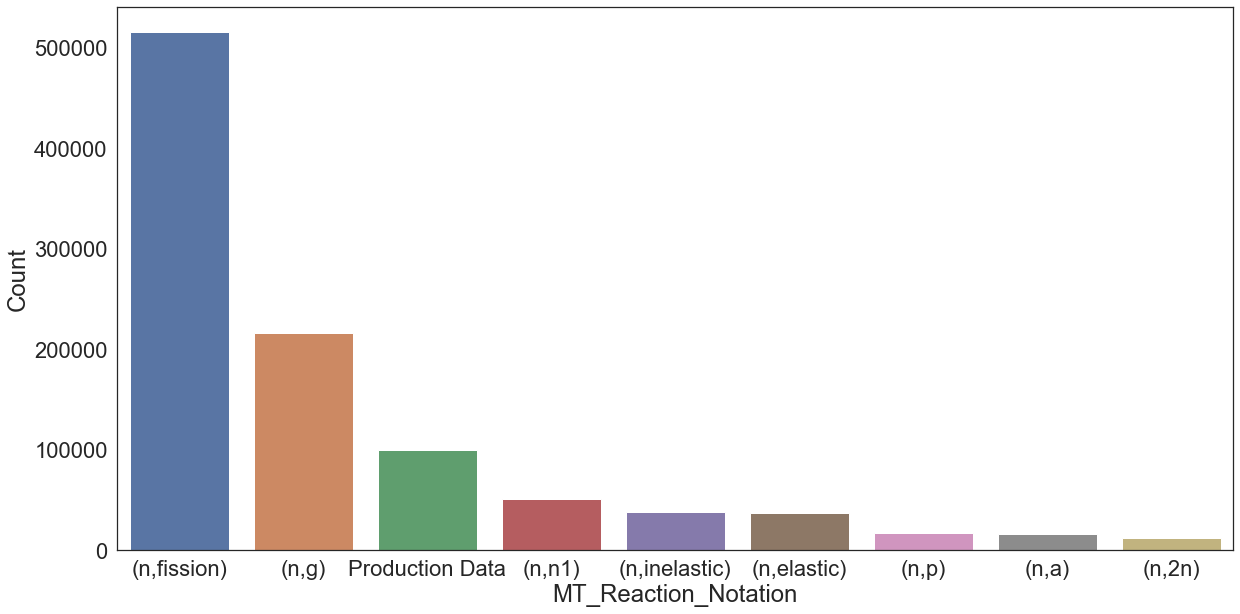

In [292]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="MT_Reaction_Notation", y="Count", data=MT_value_counts[1:10])

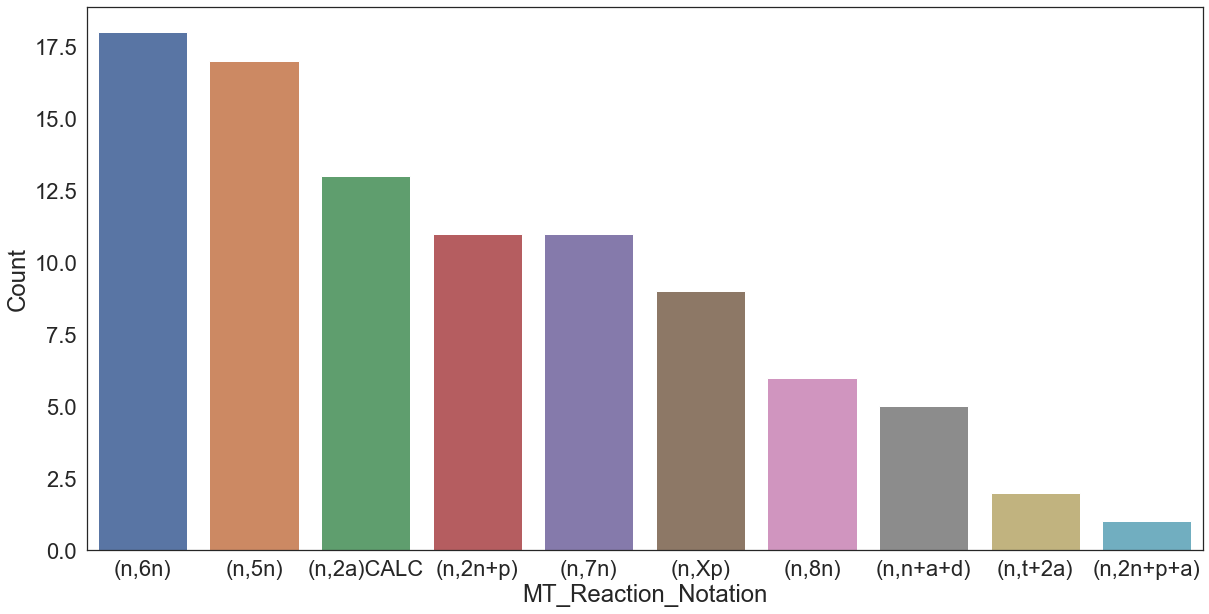

In [293]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="MT_Reaction_Notation", y="Count", data=MT_value_counts[-10:])

## Reaction Channel (MT Values) Experimental Campaigns

In [302]:
mt_experiment_campaigns = df[["MT", "Title"]].drop_duplicates()
mt_experiment_campaigns = mt_experiment_campaigns.merge(mt_codes)

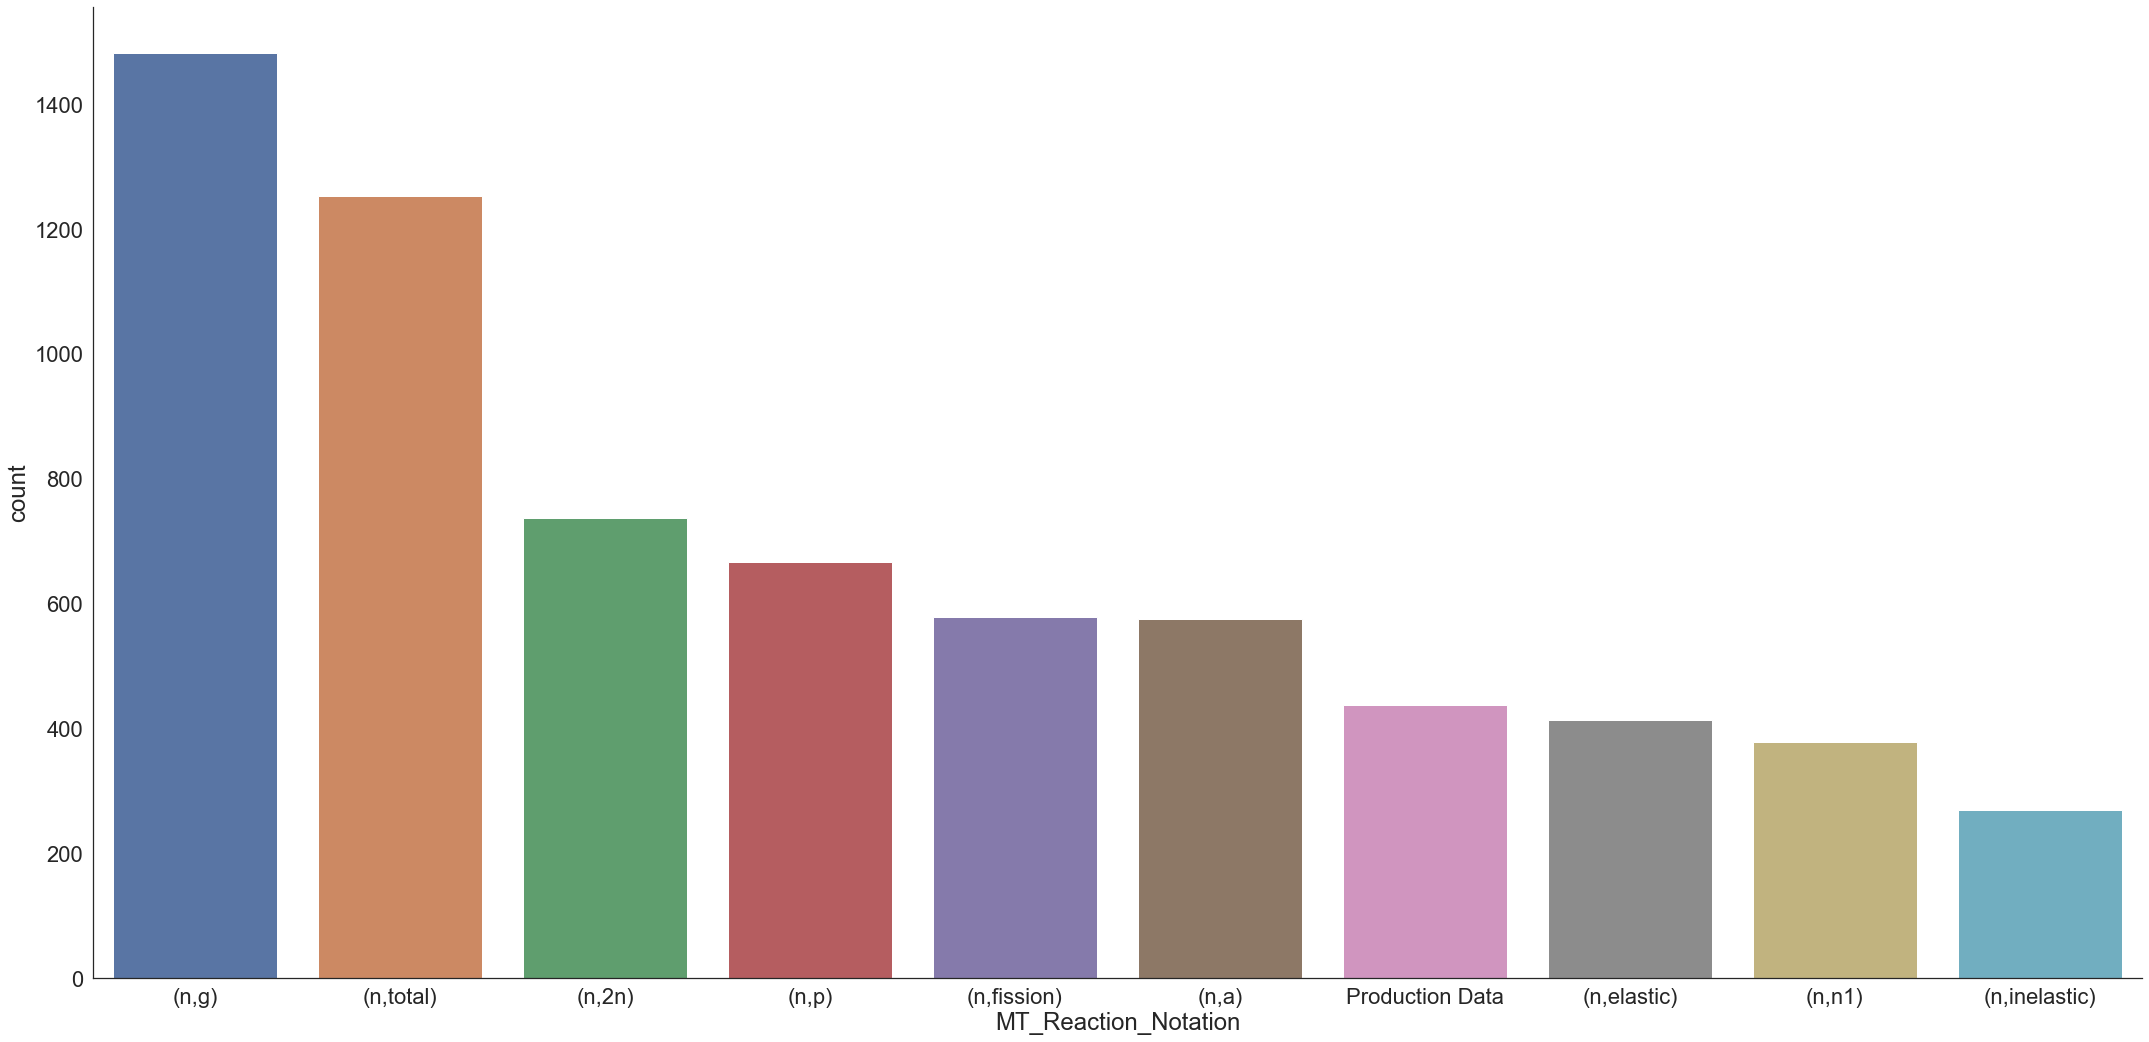

In [305]:
sns.catplot(x="MT_Reaction_Notation", kind="count", data=mt_experiment_campaigns,
                order=mt_experiment_campaigns["MT_Reaction_Notation"].value_counts().iloc[:10].index,
                height=15, aspect=2)

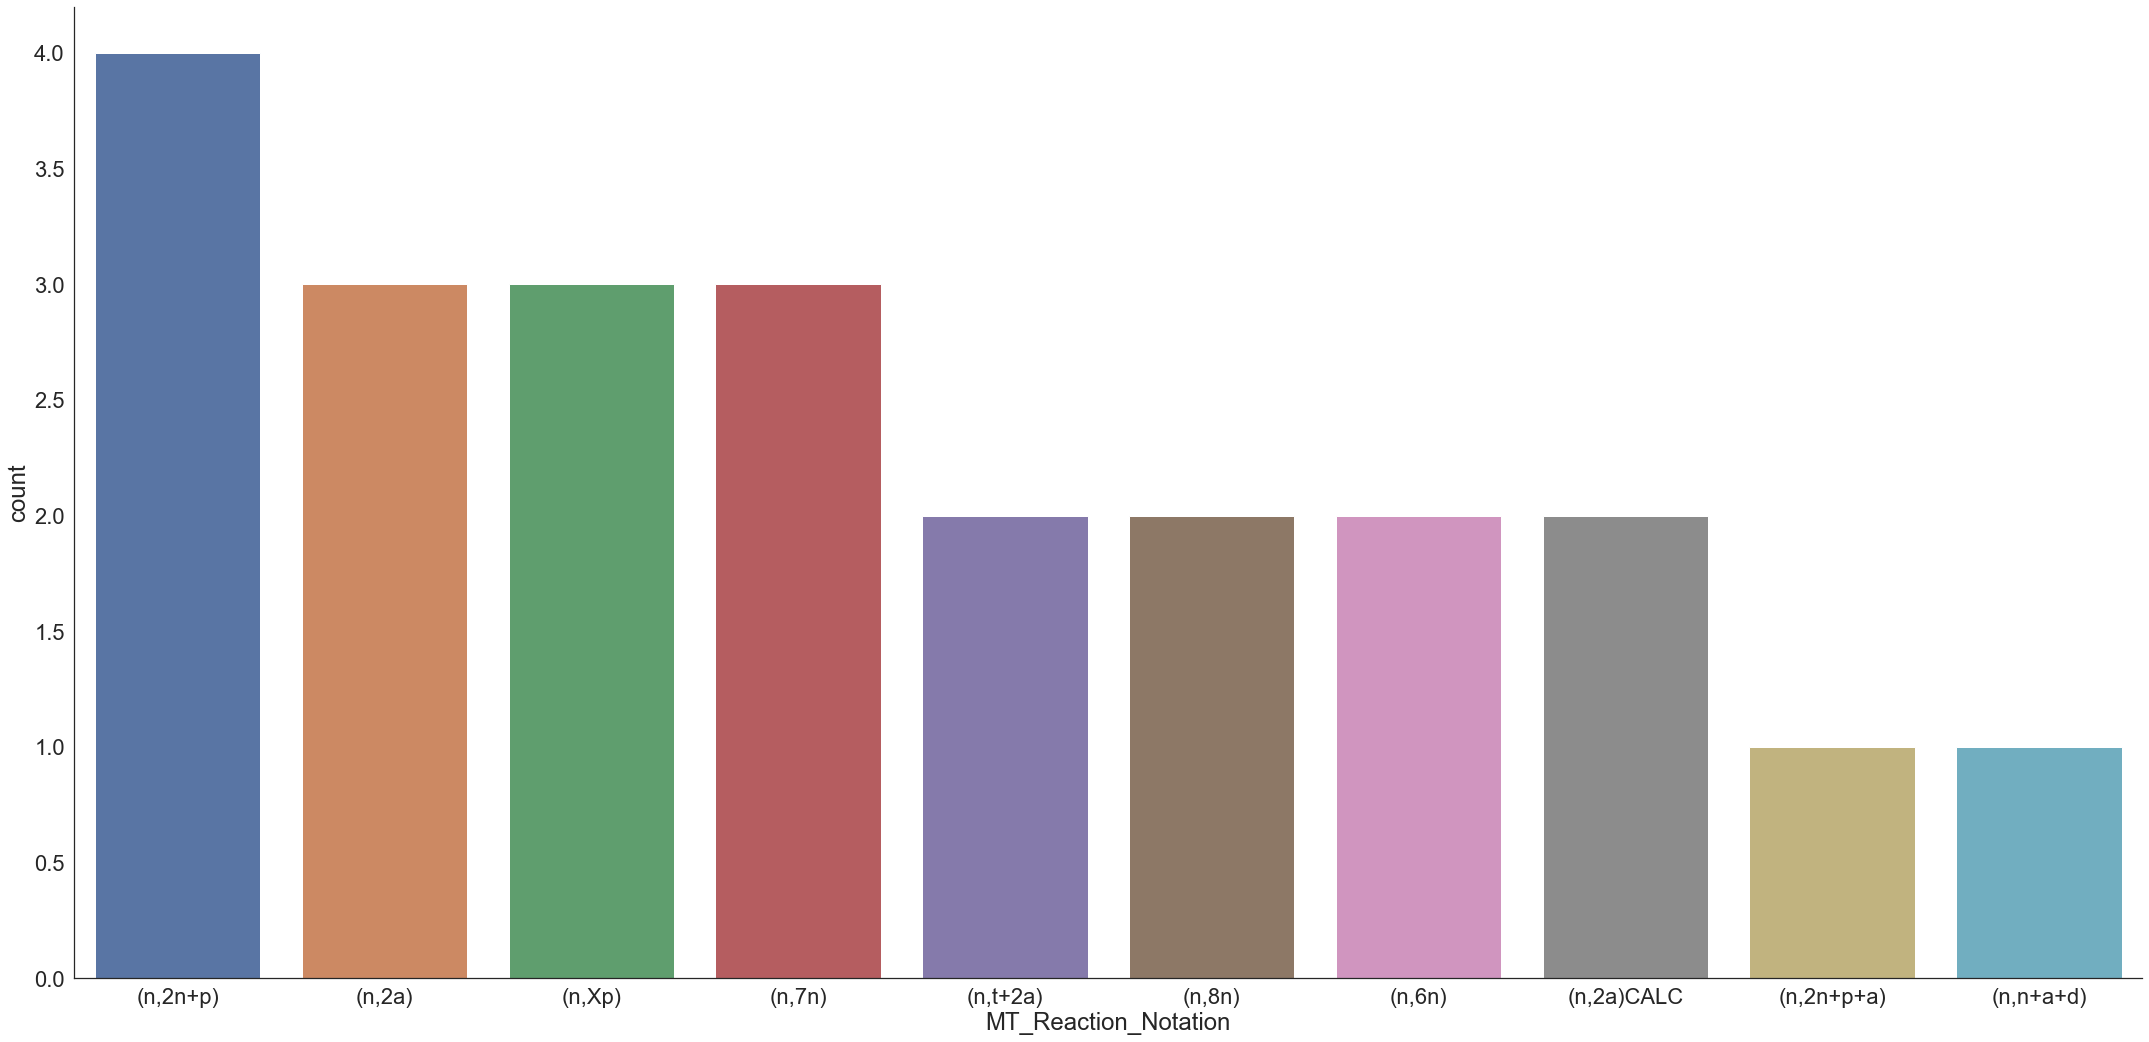

In [304]:
sns.catplot(x="MT_Reaction_Notation", kind="count", data=mt_experiment_campaigns,
                order=mt_experiment_campaigns["MT_Reaction_Notation"].value_counts().iloc[-10:].index,
                height=15, aspect=2)

## EXFOR Status

In [408]:
# for paper/thesis
# print(df.EXFOR_Status.value_counts().to_latex(index=True))

<Figure size 1008x720 with 0 Axes>

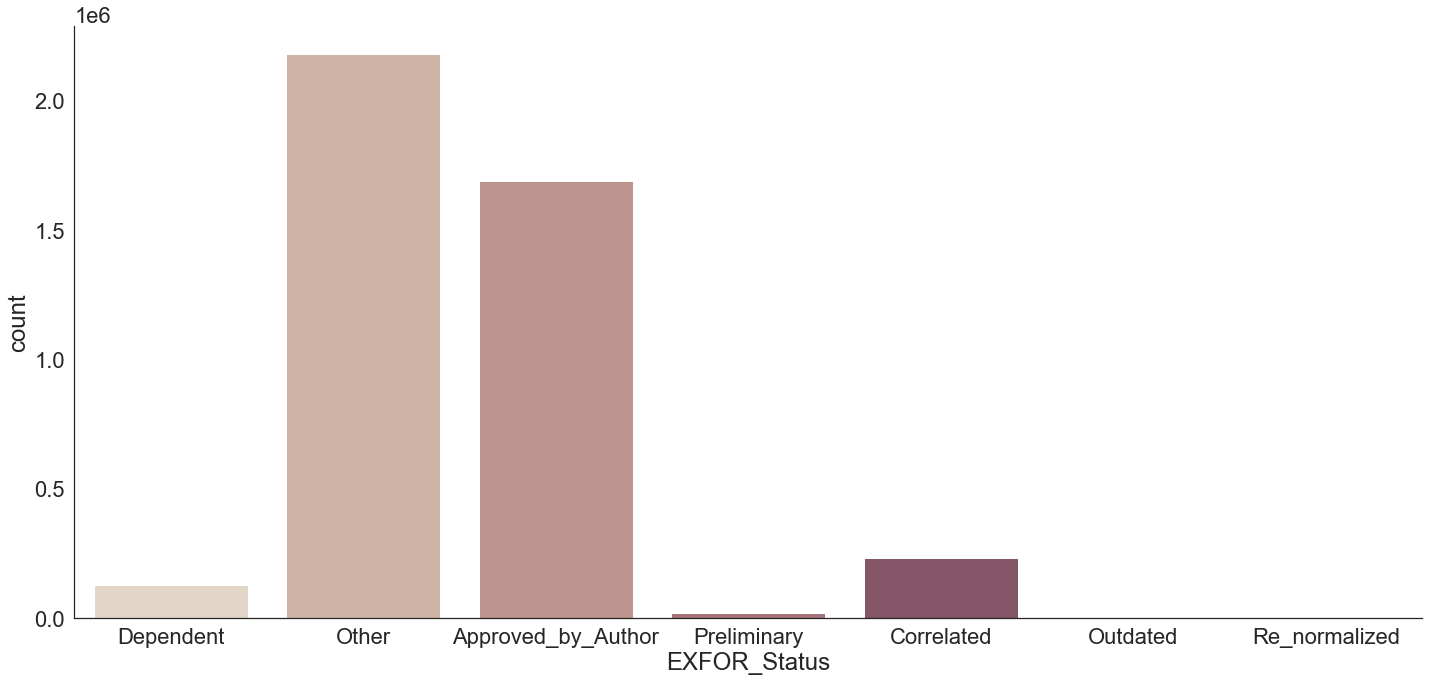

In [166]:
plt.figure(figsize=(14,10))
sns.catplot(x="EXFOR_Status", kind="count", palette="ch:.25", data=df, ci=None, height=10, aspect=2)
plt.savefig(os.path.join(figure_dir, "exfor_status.png"), bbox_inches='tight', dpi=600)

## Center of Mass Flag

In [165]:
df.Center_of_Mass_Flag.value_counts()

Lab               4250745
Center_of_Mass       4664
Name: Center_of_Mass_Flag, dtype: int64

## Proton and Neutorn Distribution

In [410]:
# plt.figure(figsize=(14,10))
# sns.distplot(df.Z.values, label="# of Protons")
# plt.xlabel('Number of Protons')
# plt.ylabel('Distribution')
# plt.savefig(os.path.join(figure_dir, "proton_distribution.png"), bbox_inches='tight', dpi=600)

In [409]:
# plt.figure(figsize=(14,10))
# sns.distplot(df.N.values, label="# of Neutrons")
# plt.xlabel('Number of Neutrons')
# plt.ylabel('Distribution')
# plt.savefig(os.path.join(figure_dir, "neutron_distribution.png"), bbox_inches='tight', dpi=600)

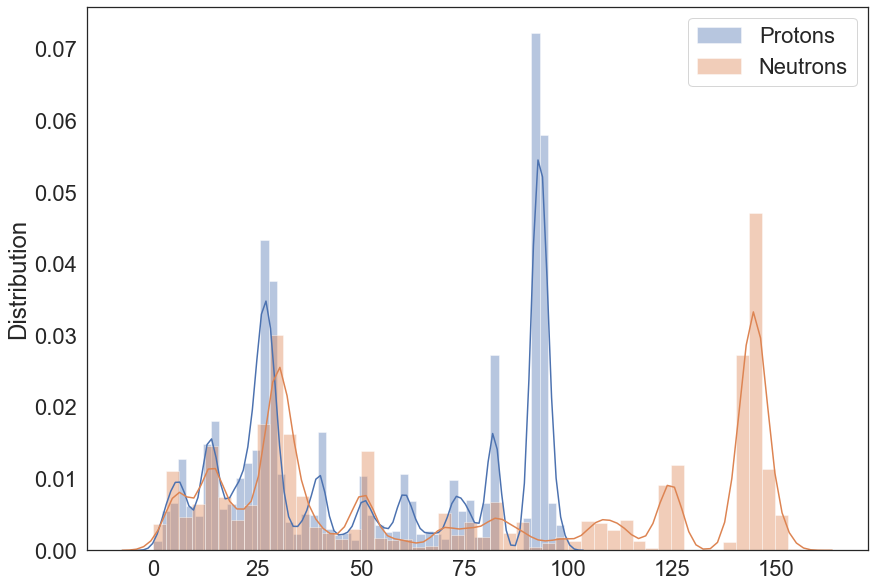

In [324]:
plt.figure(figsize=(14,10))
sns.distplot(df.Z.values, label="Protons")
sns.distplot(df.N.values, label="Neutrons")
# plt.xlabel('Number of Neutrons')
plt.ylabel('Distribution')
plt.legend()
plt.savefig(os.path.join(figure_dir, "proton_neutron_distribution.png"), bbox_inches='tight', dpi=600)

## Experimental Campaings per Year

In [169]:
sns.set(font_scale=1)
sns.set_style("white")

In [170]:
campaigns = df[['Year', 'Title']].groupby(['Year']).agg(['count']).reset_index().sort_values(by="Year")
campaigns.columns = ["Year", "Counts"]

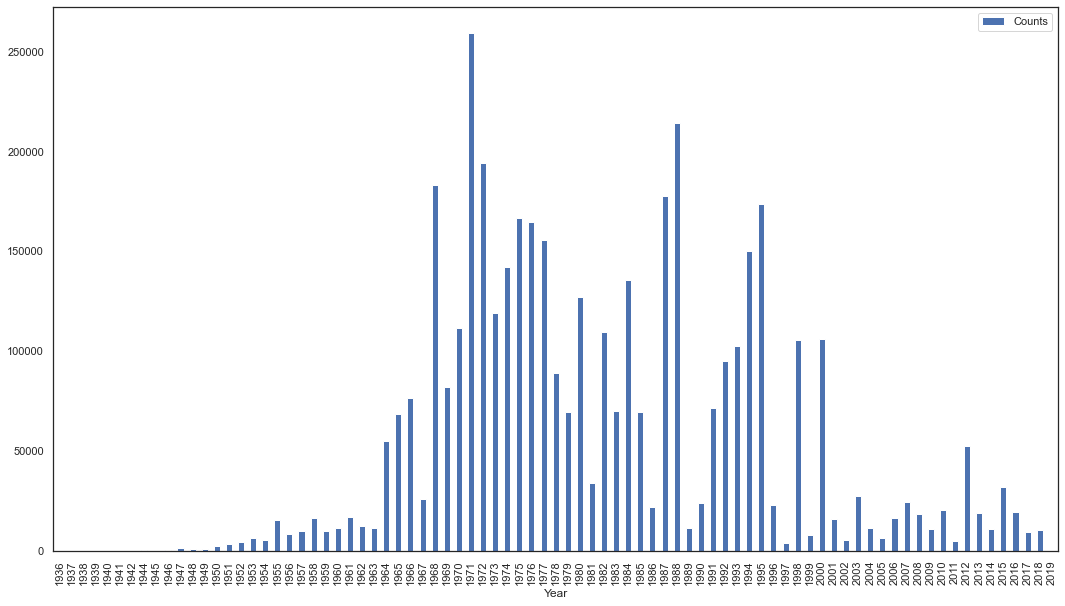

In [171]:
campaigns.plot(x="Year", y="Counts", kind='bar', figsize=(18,10))
plt.savefig(os.path.join(figure_dir, 'EXFOR_experiments_year.png'), bbox_inches='tight', dpi=600)

## Institute (Experimental Campaigns per Insitute)

In [173]:
sns.set(font_scale=2)
sns.set_style("white")

In [200]:
institute_codes = pd.read_csv("../../CSV_Files/institute_codes.csv")

In [208]:
top_campaigns_institutes = df[["Institute", "Title"]].drop_duplicates().Institute.value_counts()
top_campaigns_institutes[:10]

1USAORL    338
1USAANL    275
1USALAS    241
2GERKFK    157
2UK HAR    155
2ZZZGEL    142
4RUSFEI    131
1USALRL    108
2JPNJAE     83
3CPRAEP     82
Name: Institute, dtype: int64

## Institute (Experimental Datapoints per Insitute)

In [209]:
top_campaigns_institutes_names = []
for i in top_campaigns_institutes.index[:10]:
    top_campaigns_institutes_names.append(institute_codes[institute_codes.Institute == i].Institute_Name.values[0])

top_campaigns_institutes_names

['Oak Ridge National Laboratory, Oak Ridge, TN',
 'Argonne National Laboratory, Argonne, IL',
 'Los Alamos National Laboratory, NM',
 'Kernforschungszentrum, Karlsruhe',
 'AERE, Harwell, Berks, England',
 'Inst. for Ref. Mat. and Meas. (IRNM), Geel, Belgium',
 'Fiziko-Energeticheskii Inst., Obninsk',
 'Lawrence Livermore National Laboratory, Livermore, CA',
 'Japan Atomic Energy Agency (JAEA)',
 'Inst. of Atomic Energy, Beijing']

In [210]:
top_datapoints_institutes = df.Institute.value_counts()
top_datapoints_institutes[:10]

1USAORL    1804518
2ZZZGEL     601978
1USALAS     283490
2FR SAC     262806
2GERKFK     235524
1USACOL     146553
2UK HAR     111317
2JPNJAE      91830
1USAANL      73776
1USARPI      65099
Name: Institute, dtype: int64

In [211]:
top_datapoints_institutes_names = []
for i in top_datapoints_institutes.index[:10]:
    top_datapoints_institutes_names.append(institute_codes[institute_codes.Institute == i].Institute_Name.values[0])

top_datapoints_institutes_names

['Oak Ridge National Laboratory, Oak Ridge, TN',
 'Inst. for Ref. Mat. and Meas. (IRNM), Geel, Belgium',
 'Los Alamos National Laboratory, NM',
 'C.E.N. Saclay',
 'Kernforschungszentrum, Karlsruhe',
 'Columbia University, New York, NY',
 'AERE, Harwell, Berks, England',
 'Japan Atomic Energy Agency (JAEA)',
 'Argonne National Laboratory, Argonne, IL',
 'Rensselaer Polytechnic Institute, Troy, NY']

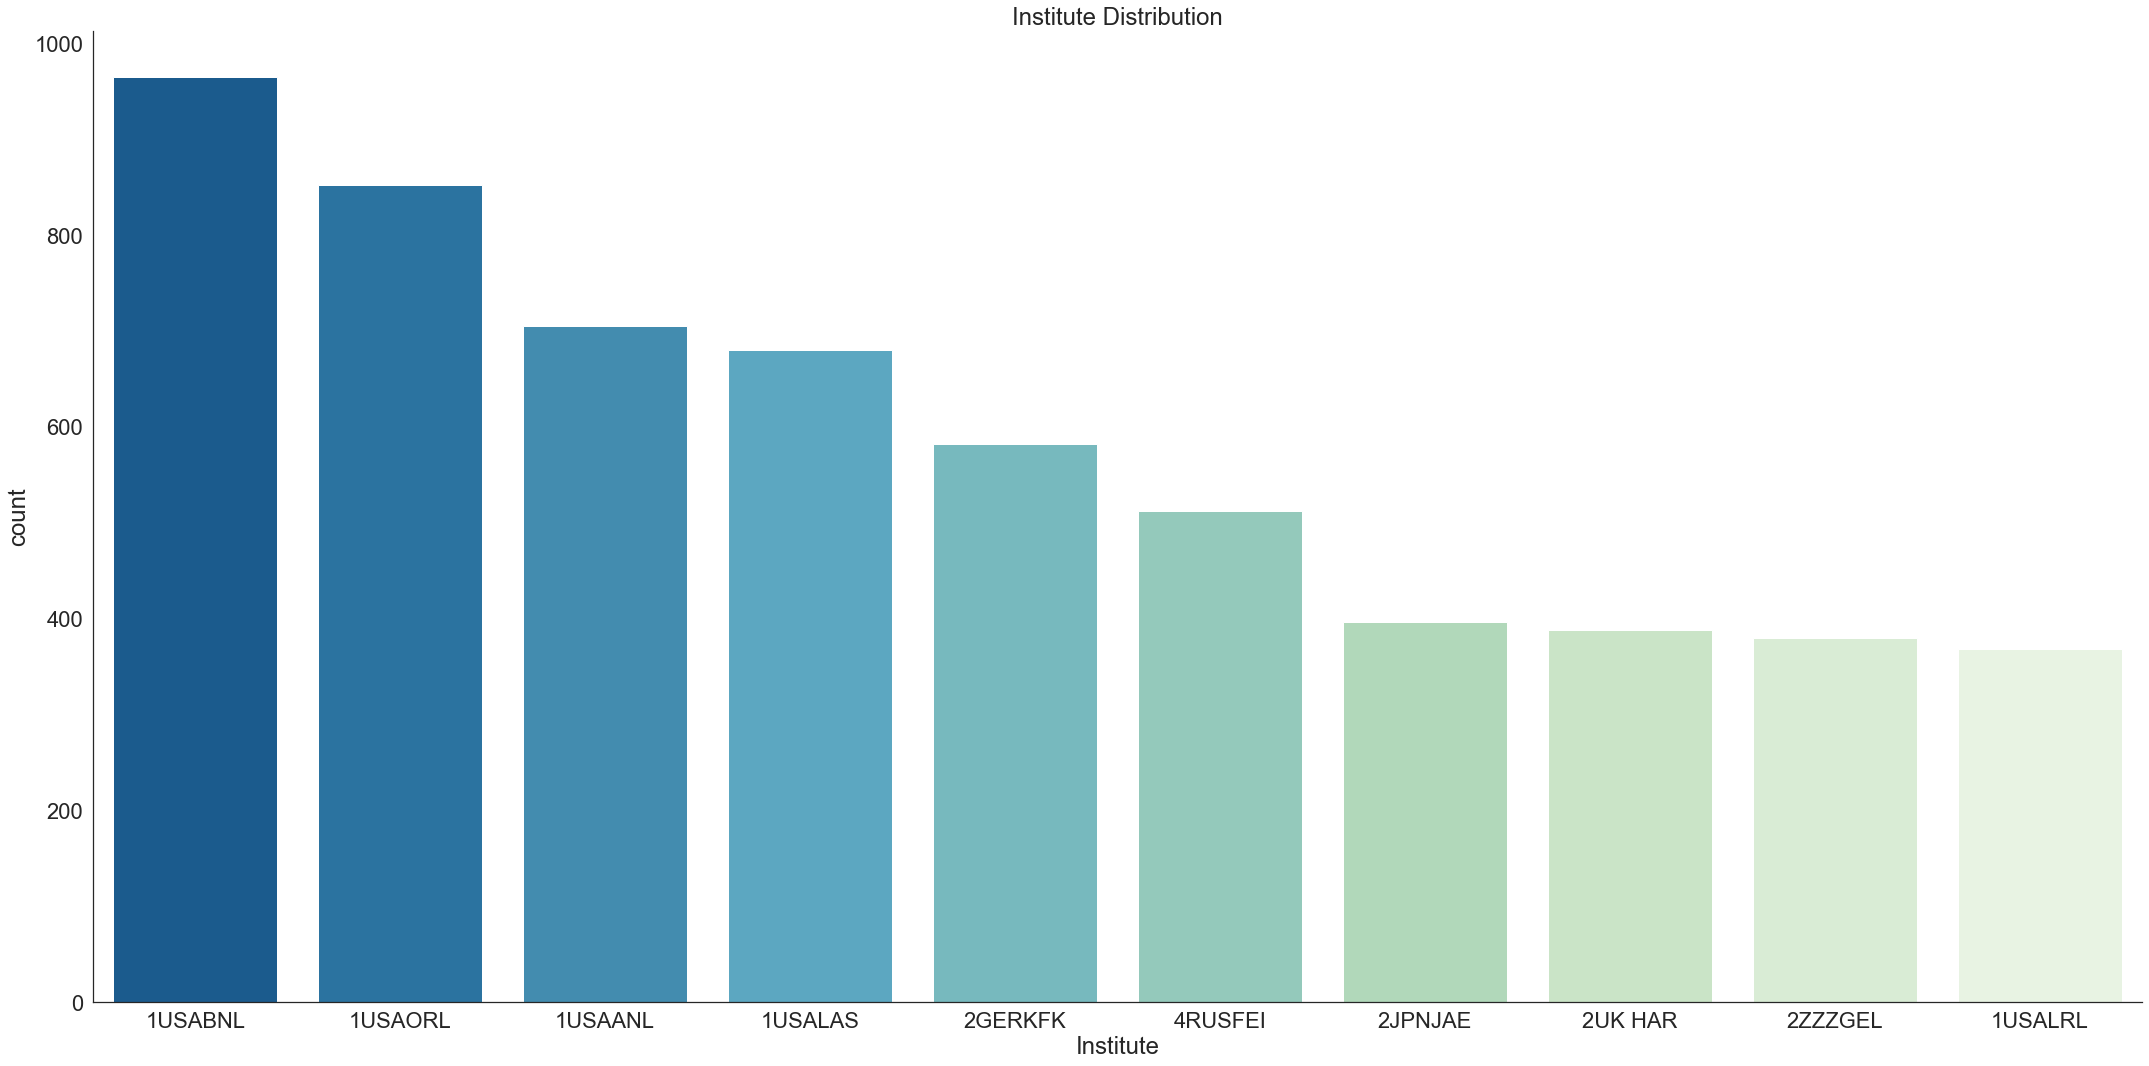

In [174]:
cat_cols_plot = ["Institute"]
plot_utils.cat_plot(cat_cols_plot, df, 'Reference', save=True, path=figure_dir + "EXFOR")

## Isotope Distributions

As for Isotopes, Fe-56, Pu-239, U-235, 238U 233U Al-27 Np-237, 91Zr cover the majority of the measruments here.

In [331]:
isotope_distribution = pd.DataFrame(df.Isotope.value_counts()).reset_index()
isotope_distribution.columns = ["Isotope", "Count"]
# print(isotope_distribution.to_latex(index=False))

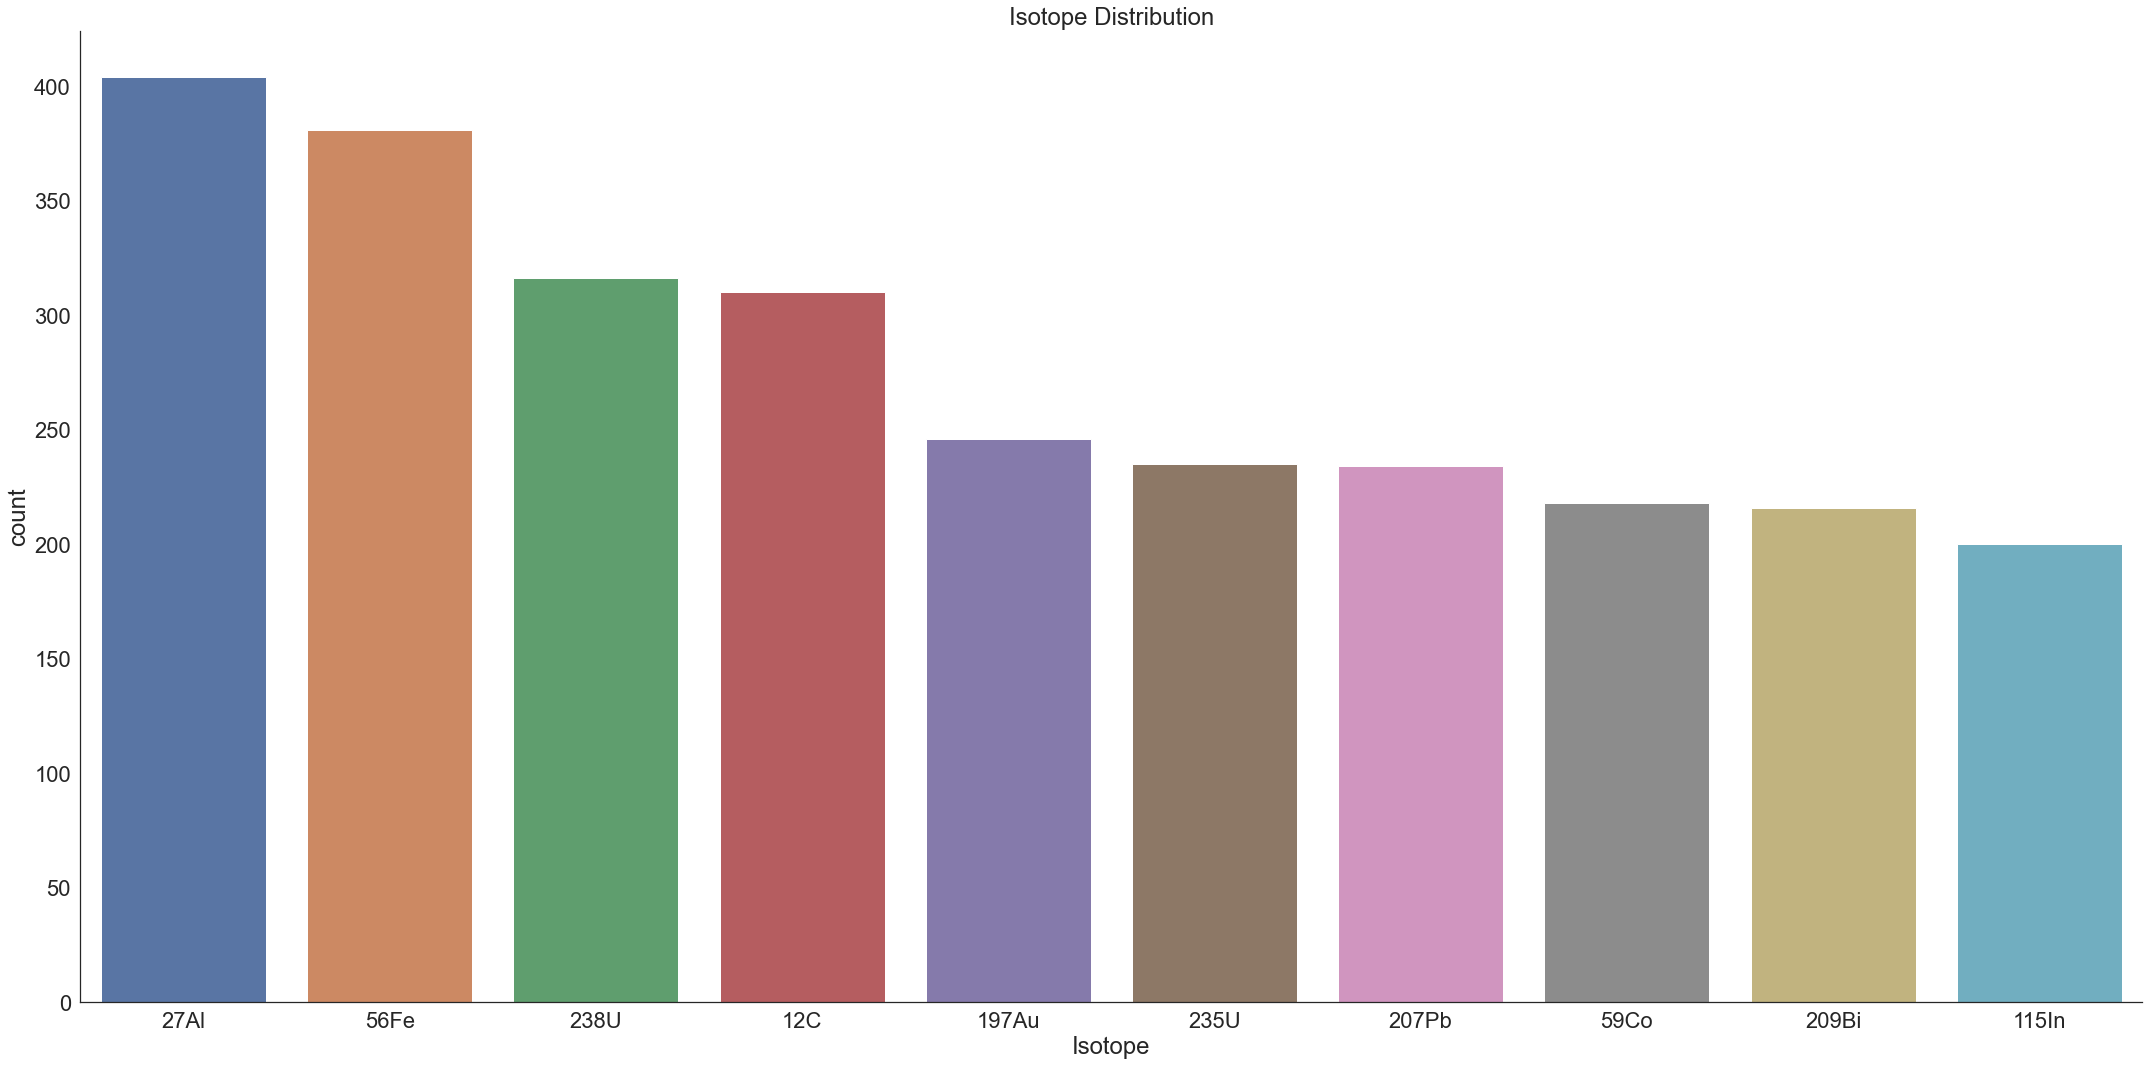

In [333]:
cat_cols_plot = ["Isotope"]
plot_utils.cat_plot(cat_cols_plot, df, 'Reference', save=False, path=figure_dir + "EXFOR")

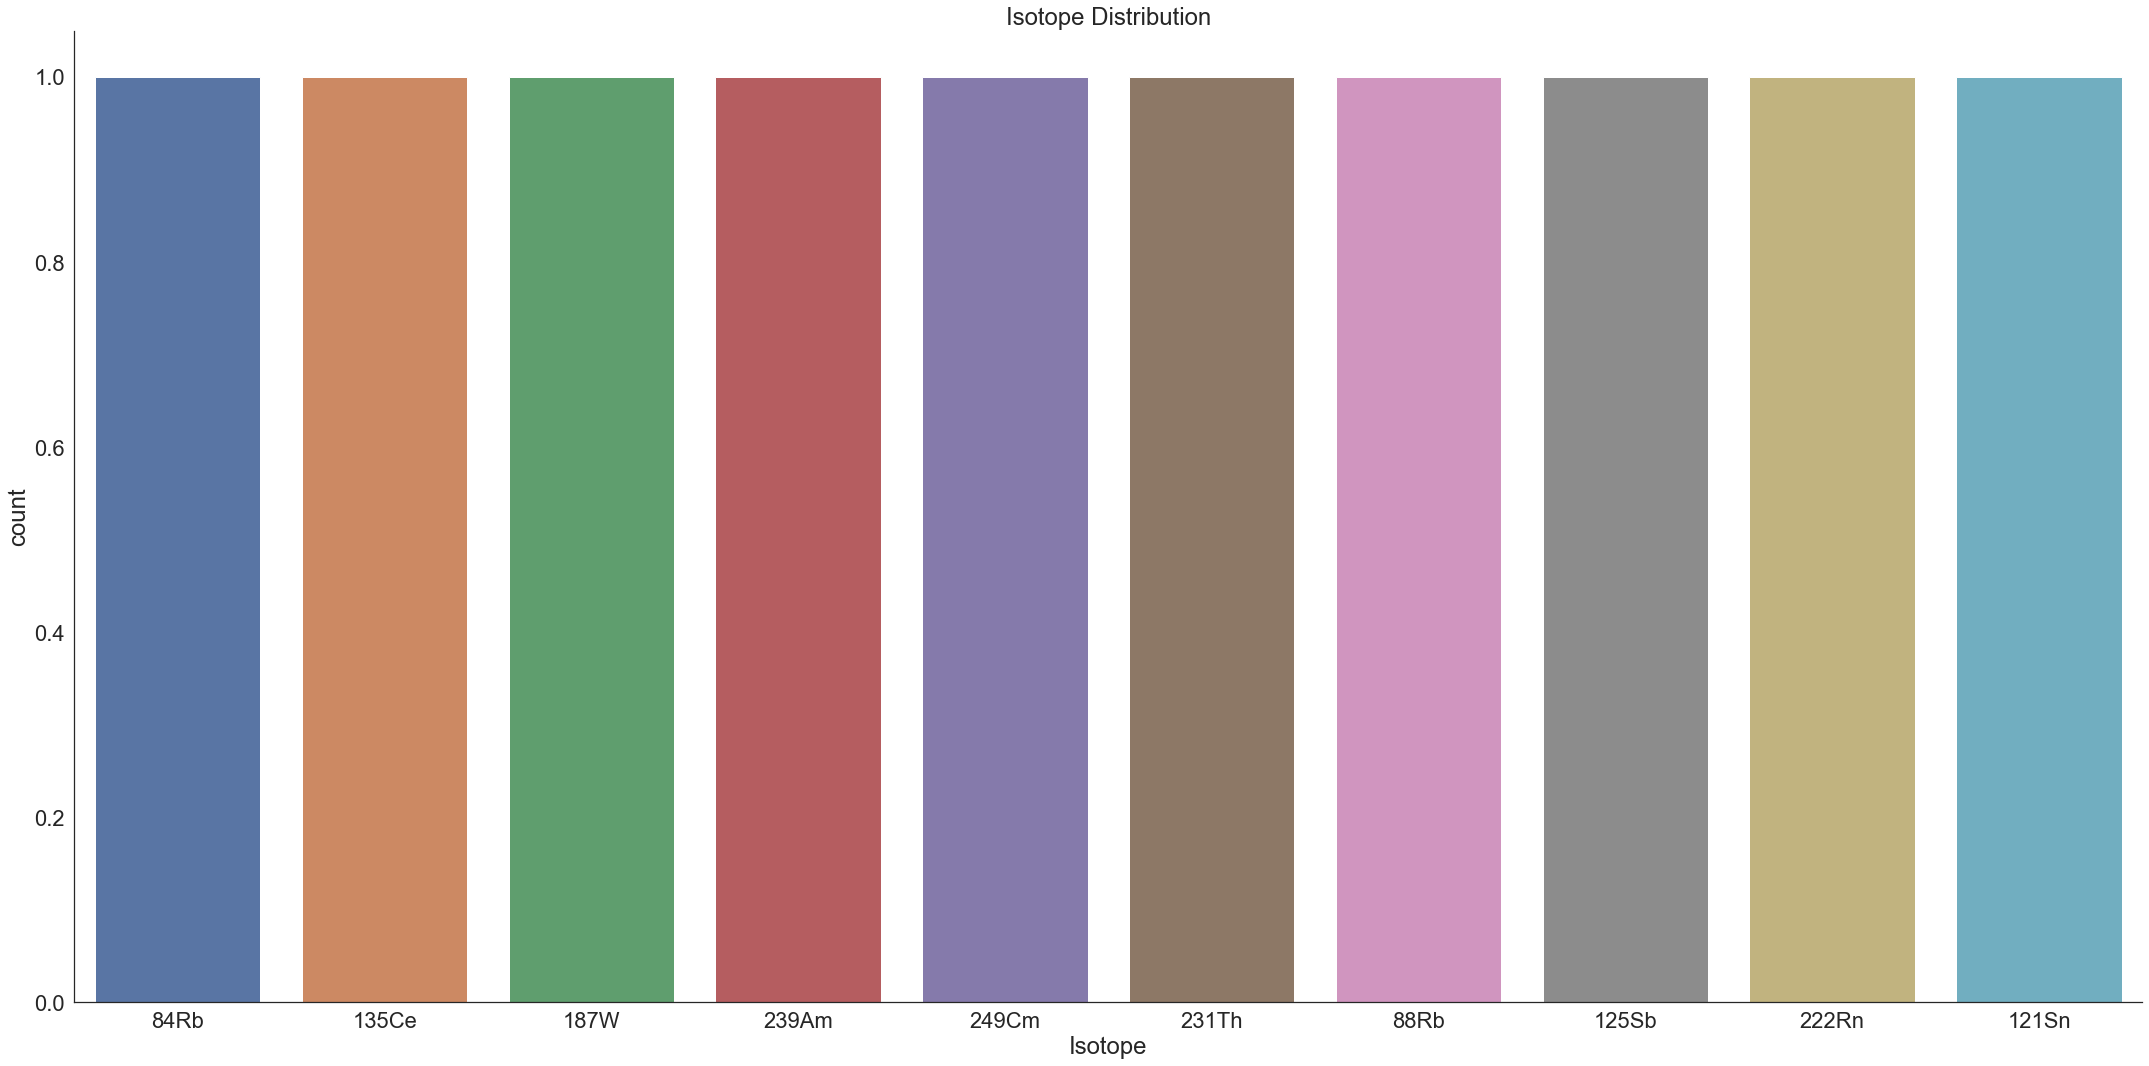

In [334]:
cat_cols_plot = ["Isotope"]
plot_utils.cat_plot(cat_cols_plot, df, 'Reference', reverse=True, save=False, path=figure_dir + "EXFOR")

## Element Flag (Natural and Isotopic Measurments)

In [338]:
print(df.Element_Flag.value_counts().to_latex(index=True))

\begin{tabular}{lr}
\toprule
{} &  Element\_Flag \\
\midrule
I &       3218578 \\
N &       1036831 \\
\bottomrule
\end{tabular}



## Nucleus Radius and Neutron-to-Nucleus Radius Ratio

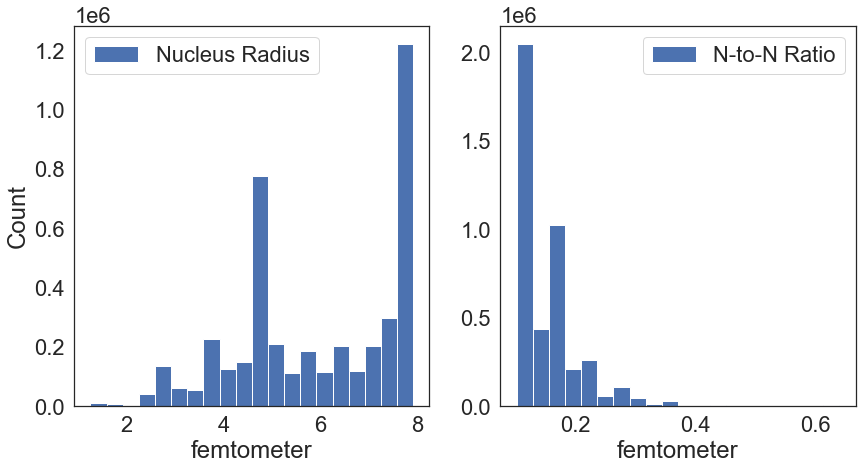

In [362]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
ax1.hist(df.Nucleus_Radius.values, label="Nucleus Radius", bins=20)
ax2.hist(df.Neutron_Nucleus_Radius_Ratio.values, label="N-to-N Ratio", bins=20)
ax1.set_ylabel("Count")
ax1.set_xlabel("femtometer")
ax2.set_xlabel("femtometer")
ax1.legend()
ax2.legend()
plt.savefig(os.path.join(figure_dir, "nucleus_radius_ratio.png"), bbox_inches='tight', dpi=600)

## Energy Distribution

In [367]:
df = df[df.Energy != 0]

In [371]:
# # Let us save our energy points in an array for analysis
# energy = ((df.sort_values(by="Energy").Energy) * 1E-6)
# energy_l15 = energy[energy < 20]

energy = ((df[df.Energy < 2.0E7].sort_values(by="Energy").Energy))

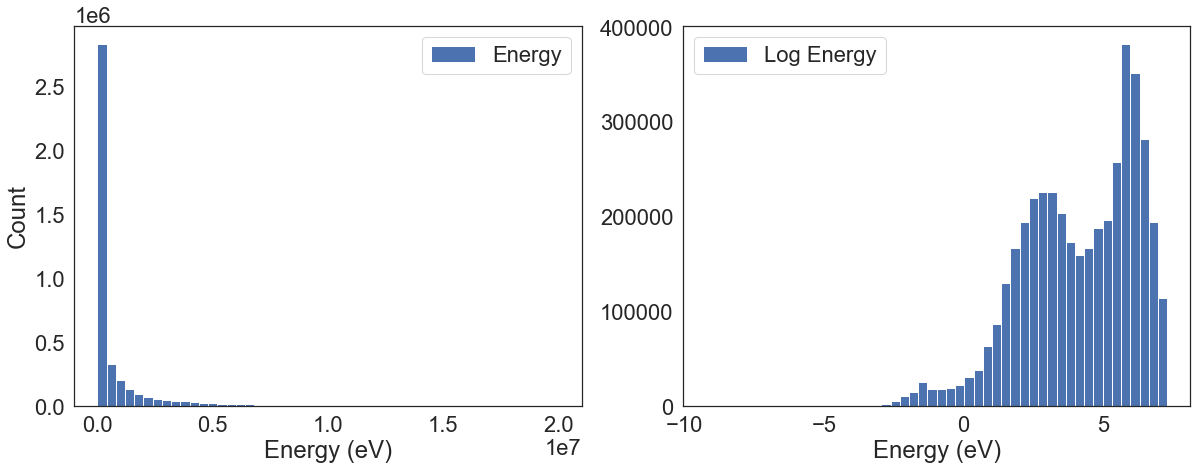

In [389]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
ax1.hist(energy, label="Energy", bins=50)
ax2.hist(np.log10(energy), label="Log Energy", bins=50)
ax1.set_ylabel("Count")
ax1.set_xlabel("Energy (eV)")
ax2.set_xlabel("Energy (eV)")
ax1.legend()
ax2.legend()
plt.savefig(os.path.join(figure_dir, "energy_distribution.png"), bbox_inches='tight', dpi=600)

## Cross Section Distribution

In [392]:
df = df[df.Data != 0]

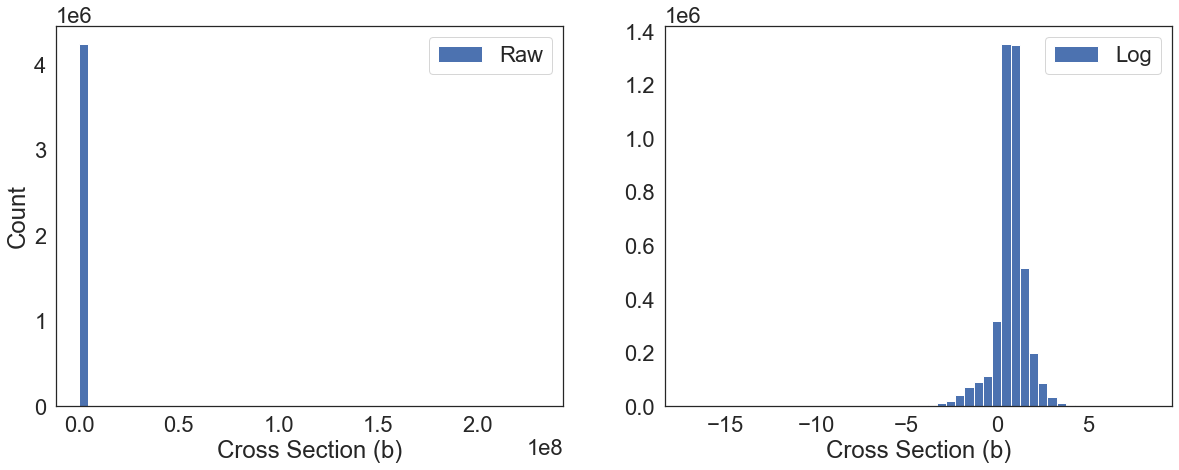

In [394]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,7))
ax1.hist(df.Data.values, label="Raw", bins=50)
ax2.hist(np.log10(df.Data.values), label="Log", bins=50)
ax1.set_ylabel("Count")
ax1.set_xlabel("Cross Section (b)")
ax2.set_xlabel("Cross Section (b)")
ax1.legend()
ax2.legend()
plt.savefig(os.path.join(figure_dir, "cross_section_distribution.png"), bbox_inches='tight', dpi=600)